## Final Project Submission

Please fill out:
* Student name: Christopher Freyre
* Student pace: part time
* Scheduled project review date/time: 11 September 2022
* Instructor name: Hardik Idnani
* Blog post URL: https://github.com/ChrisFreyre/dsc-phase-1-project


In [1]:
# IMPORTING LIBRAIRIES
import csv
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt

## Clean Datasets:

### Movie Titles data:

In [2]:
!ls

Microsoft_data.csv         imdb.title.ratings.csv.gz
README.md                  student.ipynb
bom.movie_gross.csv.gz     studios_domestic_gross.csv
first_recomendation.png    zippedData
imdb.title.basics.csv.gz


In [3]:
# IMPORT MOVIE TITLES DATA
df_title = pd.read_csv('imdb.title.basics.csv.gz')

In [4]:
df_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [5]:
df_title

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [6]:
# DROP COLUMN WE DON'T NEED 
df_title.drop(columns = ['runtime_minutes', 'original_title'], inplace = True)

In [7]:
#DROP ALL DUPLICATES IN COLUMN 
df_title.drop_duplicates(subset="primary_title", keep='first', inplace=True)
df_title

,tconst,primary_title,start_year,genres
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,Drama
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy"
...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,2019,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,Documentary
146141,tt9916706,Dankyavar Danka,2013,Comedy
146142,tt9916730,6 Gunn,2017,NaN


### Ratings data:

In [8]:
!ls

Microsoft_data.csv         imdb.title.ratings.csv.gz
README.md                  student.ipynb
bom.movie_gross.csv.gz     studios_domestic_gross.csv
first_recomendation.png    zippedData
imdb.title.basics.csv.gz


In [9]:
# IMPORT MOVIE RATINGS DATA
df_ratings = pd.read_csv('imdb.title.ratings.csv.gz')

In [10]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [11]:
df_ratings

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [12]:
# DROP COLUMN WE DON'T NEED 
df_ratings.drop(columns = ['numvotes'], inplace = True)

In [13]:
df_ratings

,tconst,averagerating
0,tt10356526,8.3
1,tt10384606,8.9
2,tt1042974,6.4
3,tt1043726,4.2
4,tt1060240,6.5
...,...,...
73851,tt9805820,8.1
73852,tt9844256,7.5
73853,tt9851050,4.7
73854,tt9886934,7.0


### Movie Gross data:

In [14]:
!ls

Microsoft_data.csv         imdb.title.ratings.csv.gz
README.md                  student.ipynb
bom.movie_gross.csv.gz     studios_domestic_gross.csv
first_recomendation.png    zippedData
imdb.title.basics.csv.gz


In [15]:
# IMPORT MOVIE GROSS DATA
df_moive_gross = pd.read_csv('bom.movie_gross.csv.gz')

In [16]:
df_moive_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [17]:
df_moive_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [18]:
# DROP COLUMN WE DON'T NEED 
df_moive_gross.drop(columns = ['foreign_gross'], inplace = True)

In [19]:
#DROP ALL DUPLICATES IN COLUMN 
df_moive_gross.drop_duplicates(subset="title", keep='first', inplace=True)
df_moive_gross

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,2018
3384,El Pacto,Sony,2500.0,2018
3385,The Swan,Synergetic,2400.0,2018


In [20]:
# REPLACE NAME OF THE COLUMN TITLE TO PRIMARY_TITLE

df_moive_gross=df_moive_gross.rename(columns = {'title':'primary_title'})
df_moive_gross

,primary_title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,2018
3384,El Pacto,Sony,2500.0,2018
3385,The Swan,Synergetic,2400.0,2018


### Merge Datas sets:

In [21]:
# MERGE DATA FRAME DF_GROSS_MOVIES1 WITH RATING1 BY TCONST
df_title_rating = pd.merge(df_title,df_ratings, on = "tconst")
df_title_rating

,tconst,primary_title,start_year,genres,averagerating
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",7.0
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",7.2
2,tt0069049,The Other Side of the Wind,2018,Drama,6.9
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama",6.1
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.5
...,...,...,...,...,...
68822,tt9911774,Padmavyuhathile Abhimanyu,2019,Drama,8.4
68823,tt9913056,Swarm Season,2019,Documentary,6.2
68824,tt9913084,Diabolik sono io,2019,Documentary,6.2
68825,tt9914286,Sokagin Çocuklari,2019,"Drama,Family",8.7


In [22]:
# MERGE DATAFRAME MOVIES2 WITH GROSS2 BY PRIMARY TITLE
big_df = pd.merge(df_title_rating,df_moive_gross, on = "primary_title")
big_df

,tconst,primary_title,start_year,genres,averagerating,studio,domestic_gross,year
0,tt0315642,Wazir,2016,"Action,Crime,Drama",7.1,Relbig.,1100000.0,2016
1,tt0337692,On the Road,2012,"Adventure,Drama,Romance",6.1,IFC,744000.0,2012
2,tt0359950,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",7.3,Fox,58200000.0,2013
3,tt0365907,A Walk Among the Tombstones,2014,"Action,Crime,Drama",6.5,Uni.,26300000.0,2014
4,tt0369610,Jurassic World,2015,"Action,Adventure,Sci-Fi",7.0,Uni.,652300000.0,2015
...,...,...,...,...,...,...,...,...
2544,tt8331988,The Chambermaid,2018,Drama,7.1,FM,300.0,2015
2545,tt8404272,How Long Will I Love U,2018,Romance,6.5,WGUSA,747000.0,2018
2546,tt8427036,Helicopter Eela,2018,Drama,5.4,Eros,72000.0,2018
2547,tt9078374,Last Letter,2018,"Drama,Romance",6.4,CL,181000.0,2018


In [23]:
big_df.columns

Index(['tconst', 'primary_title', 'start_year', 'genres', 'averagerating',
       'studio', 'domestic_gross', 'year'],
      dtype='object')

In [24]:
# SAVING DATAFRAME AS CSV FILE 

big_df.to_csv('/Users/christopherfreyre/Documents/Academy Xi/Microsoft_project/dsc-phase-1-project/Microsoft_data.csv', index=False)
              
              

# 1st. recomendation:
### Find top 5 movie studios in relation to Domestic Gross

In [25]:
# IMPORTIN MAIN DATAFRAME

microsoft_data = pd.read_csv('Microsoft_data.csv')


In [26]:
# CHECK COLUMNS
microsoft_data.columns

Index(['tconst', 'primary_title', 'start_year', 'genres', 'averagerating',
       'studio', 'domestic_gross', 'year'],
      dtype='object')

In [27]:
# HOW MANY YEARS OF DATA 
set(microsoft_data['year'])

{2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018}

In [28]:
# ADD VARIABLE STUDIOS AND CORRELATED COLUMNS
studios = microsoft_data.loc[:, ['studio', 'domestic_gross', 'year']]

In [29]:
studios

,studio,domestic_gross,year
0,Relbig.,1100000.0,2016
1,IFC,744000.0,2012
2,Fox,58200000.0,2013
3,Uni.,26300000.0,2014
4,Uni.,652300000.0,2015
...,...,...,...
2544,FM,300.0,2015
2545,WGUSA,747000.0,2018
2546,Eros,72000.0,2018
2547,CL,181000.0,2018


In [30]:
# CHECK FOR NAN CELLS
studios.isna().sum()

studio             3
domestic_gross    17
year               0
dtype: int64

In [31]:
# DROPPIN ALL NA SPACES

studios.dropna(inplace=True)

In [32]:
studios

,studio,domestic_gross,year
0,Relbig.,1100000.0,2016
1,IFC,744000.0,2012
2,Fox,58200000.0,2013
3,Uni.,26300000.0,2014
4,Uni.,652300000.0,2015
...,...,...,...
2544,FM,300.0,2015
2545,WGUSA,747000.0,2018
2546,Eros,72000.0,2018
2547,CL,181000.0,2018


In [33]:
#CROSSTAB STUDIOS YEAR WITH DOMESTIC GROSS

studios_gross_total = pd.crosstab(studios.studio,studios.year, values = studios.domestic_gross,
                     aggfunc = 'sum', margins = True, margins_name = 'Total').fillna(0)


In [34]:
studios_gross_total

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total
studio,,,,,,,,,,
3D,6.100000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.100000e+06
A23,0.000000e+00,1.510000e+05,0.000000e+00,1.320000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.642000e+05
A24,0.000000e+00,0.000000e+00,0.000000e+00,2.784540e+07,1.638830e+07,5.127510e+07,3.916800e+07,8.140570e+07,4.584800e+07,2.619305e+08
ADC,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.280000e+05,0.000000e+00,2.020000e+04,0.000000e+00,2.482000e+05
AF,0.000000e+00,0.000000e+00,1.000000e+06,7.690000e+04,5.580000e+05,3.530000e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.987900e+06
...,...,...,...,...,...,...,...,...,...,...
XL,0.000000e+00,0.000000e+00,0.000000e+00,1.170000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.170000e+05
Yash,4.380000e+04,4.960000e+05,5.352600e+06,8.000000e+06,0.000000e+00,1.800000e+06,8.500000e+06,6.530000e+06,0.000000e+00,3.072240e+07
Zee,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e+06,0.000000e+00,0.000000e+00,1.100000e+06


In [35]:
#SAVING DATAFRAME OF TOTAL DOMESTIC GROSS FOR EACH STUDIO FROM 2010-2018  AS CSV FILE 

studios_gross_total.to_csv('/Users/christopherfreyre/Documents/Academy Xi/Microsoft_project/dsc-phase-1-project/studios_domestic_gross.csv')



In [36]:
#BRINGIN BACK DATAFRAME FROM FOLDER

studio_domestic_gross =  pd.read_csv('/Users/christopherfreyre/Documents/Academy Xi/Microsoft_project/dsc-phase-1-project/studios_domestic_gross.csv')



In [37]:
studio_domestic_gross

,studio,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total
0,3D,6.100000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.100000e+06
1,A23,0.000000e+00,1.510000e+05,0.000000e+00,1.320000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.642000e+05
2,A24,0.000000e+00,0.000000e+00,0.000000e+00,2.784540e+07,1.638830e+07,5.127510e+07,3.916800e+07,8.140570e+07,4.584800e+07,2.619305e+08
3,ADC,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.280000e+05,0.000000e+00,2.020000e+04,0.000000e+00,2.482000e+05
4,AF,0.000000e+00,0.000000e+00,1.000000e+06,7.690000e+04,5.580000e+05,3.530000e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.987900e+06
...,...,...,...,...,...,...,...,...,...,...,...
207,XL,0.000000e+00,0.000000e+00,0.000000e+00,1.170000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.170000e+05
208,Yash,4.380000e+04,4.960000e+05,5.352600e+06,8.000000e+06,0.000000e+00,1.800000e+06,8.500000e+06,6.530000e+06,0.000000e+00,3.072240e+07
209,Zee,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e+06,0.000000e+00,0.000000e+00,1.100000e+06
210,Zeit.,0.000000e+00,7.120000e+04,3.170000e+05,7.850000e+05,5.047000e+05,2.290000e+04,1.170000e+04,0.000000e+00,0.000000e+00,1.712500e+06


In [38]:
# JUST COLECTING ALL ROWS WITH EXEXCEPTION FOR TOTAL ROW, FOR ALL COLUMNS

total_studios = studio_domestic_gross.loc[:210, :]

# CREATING A DATASET FOR TOP 5 STUDIOS
top5_studios = total_studios.sort_values('Total', ascending = False).head(5)
top5_studios

,studio,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total
30,BV,950900000.0,9.850000e+08,8.298000e+08,1.581500e+09,1.519600e+09,1.357800e+09,2.430800e+09,1.664500e+09,2.946400e+09,1.426630e+10
193,Uni.,872900000.0,9.394000e+08,8.733000e+08,1.395800e+09,8.388000e+08,2.384338e+09,1.378000e+09,1.363300e+09,1.107222e+09,1.115306e+10
78,Fox,756300000.0,1.005300e+09,9.122000e+08,9.862000e+08,1.555400e+09,1.192000e+09,1.441900e+09,9.700000e+08,7.074000e+08,9.526700e+09
201,WB,989800000.0,1.135300e+09,1.180100e+09,9.254000e+08,7.368000e+08,6.348000e+08,1.149200e+09,1.214300e+09,1.340600e+09,9.306300e+09
176,Sony,918599999.0,7.010000e+08,1.197700e+09,7.153000e+08,6.126000e+08,6.955110e+08,3.391955e+08,9.972415e+08,4.853900e+08,6.662538e+09


In [39]:
# TOP 5 STUDIOS WITH ONLY SUTDIO AND TOTAL COULMNS

df_top5 = top5_studios.loc[:, ['studio', 'Total']]
df_top5

,studio,Total
30,BV,1.426630e+10
193,Uni.,1.115306e+10
78,Fox,9.526700e+09
201,WB,9.306300e+09
176,Sony,6.662538e+09


In [40]:
#CONVERTING DATASET INTO A LIST OF DICTS

data = top5_studios.set_index('studio').to_dict()['Total']
data

{'BV': 14266299999.0,
 'Uni.': 11153060000.0,
 'Fox': 9526699998.0,
 'WB': 9306300000.0,
 'Sony': 6662537998.0}

In [41]:
#ADDING VARIABLES TO INDIVIDUAL KEYS AND VALUES TO PLOT IN GRAPH LATER

group_data = list(data.values())
group_names = list(data.keys())
group_mean = np.mean(group_data)

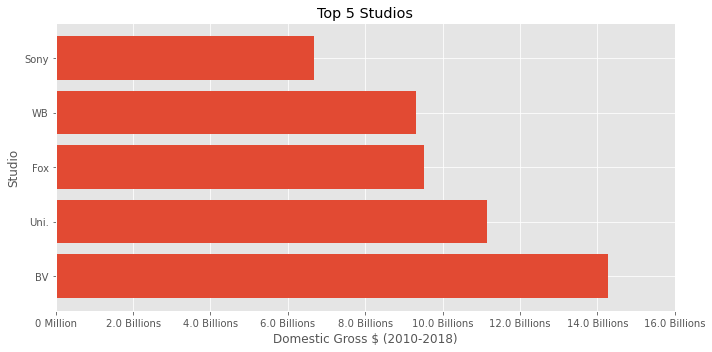

In [42]:
#PLOTING GRAPH RELATED TO STUDIOS DOMESTIC GROSS PERFOMANCE IN PERIOD 2010-2018


def format_number(group_data, indx):
    if group_data >= 1_000_000_000:
        formatter = '{:1.1f} Billions'.format(group_data*0.000000001)
    else: 
        formatter = '{:1.0f} Million'.format(group_data*0.0000001)
    return formatter

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(10, 5))

ax.barh(group_names, group_data)

step_value = 2_000_000_000

plt.xticks(np.arange(0, max(group_data)+ step_value, step_value))


ax.set(xlabel='Domestic Gross $ (2010-2018)', ylabel='Studio',
       title='Top 5 Studios')


ax.xaxis.set_major_formatter(format_number)

plt.tight_layout()
plt.savefig("first_recomendation.png")
plt.show()


In [43]:
# CHANGING FORMAT FOR DIGITS IN DOMESTIC_GROSS

df_top5['Total'] = total_studios.apply(lambda x: "{:,}".format(x['Total']), axis=1)
df_top5

,studio,Total
30,BV,"14,266,299,999.0"
193,Uni.,"11,153,060,000.0"
78,Fox,"9,526,699,998.0"
201,WB,"9,306,300,000.0"
176,Sony,"6,662,537,998.0"


# 2nd. Recomendation:

### Here we use the top 5 Movie Studios to find the genres with the biggest domestic gross and mean domestic gross

In [44]:
!ls

Microsoft_data.csv         imdb.title.ratings.csv.gz
README.md                  student.ipynb
bom.movie_gross.csv.gz     studios_domestic_gross.csv
first_recomendation.png    zippedData
imdb.title.basics.csv.gz
